<a href="https://colab.research.google.com/github/Joa1Camargo/repo-remoto/blob/main/Predi%C3%A7%C3%A3o_Pre%C3%A7o_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Passo 1: Instalar o Kaggle CLI
!pip install kaggle

# Passo 2-3: Fazer upload do kaggle.json
from google.colab import files
files.upload()

# Passo 4: Configurar ambiente
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nehalbirla_vehicle_dataset_from_cardekho_path = kagglehub.dataset_download('nehalbirla/vehicle-dataset-from-cardekho')

print('Data source import complete.')


100%|██████████| 292k/292k [00:00<00:00, 54.6MB/s]

Extracting files...
Data source import complete.


# Previsão: Preços de Veículos

### Lendo e entendendo a base

In [ ]:
#import libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings


pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')


In [ ]:
#print(os.listdir('/content/input'))

# Print the output of kagglehub.dataset_download
print(nehalbirla_vehicle_dataset_from_cardekho_path)
# List the files in nehalbirla_vehicle_dataset_from_cardekho_path
print(os.listdir(nehalbirla_vehicle_dataset_from_cardekho_path))

#load dataset
# Assuming the dataset is in the correct folder downloaded by kagglehub
df_or = pd.read_csv(os.path.join(nehalbirla_vehicle_dataset_from_cardekho_path, 'car data.csv'))

/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4
['CAR DETAILS FROM CAR DEKHO.csv', 'car details v4.csv', 'car data.csv', 'Car details v3.csv']


Analisando os tipos dos dados no dataset

In [ ]:
df_or.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df_or.shape

(301, 9)

In [ ]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Entendendo os números
df_or.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#Valores nulos
df_or.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


### ETL

Criando uma variável para a idade do carro e alterando o nome das colunas para deixar mais amigável :)

In [ ]:
df_or['Idade'] = 2020 - df_or['Year']
df_or.drop('Year',axis=1,inplace = True)

In [ ]:
df_or.rename(columns = {'Selling_Price':'Preco_venda','Present_Price':'Preco_2020','Owner':'Antigos_donos','Car_Name':'Modelo', 'Kms_Driven':'Kms_rodados', 'Fuel_Type':'Tipo_combustivel', 'Seller_Type':'Vendedor', 'Transmission':'Transmissao'},inplace = True)

### Exploratory Data Analysis (EDA)

#### Análise Univariada

In [ ]:
df_or.columns

Index(['Modelo', 'Preco_venda', 'Preco_2020', 'Kms_rodados',
       'Tipo_combustivel', 'Vendedor', 'Transmissao', 'Antigos_donos',
       'Idade'],
      dtype='object')

Verificando a distribuição das variáveis numéricas do dataset. A maior parte dos carros são a gasolina, manuais, revendidos por revendas (dealers) e -por incrível que pareça- de único dono.

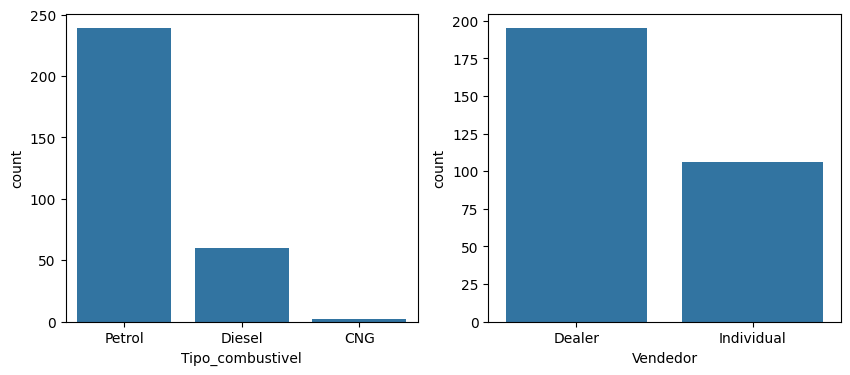

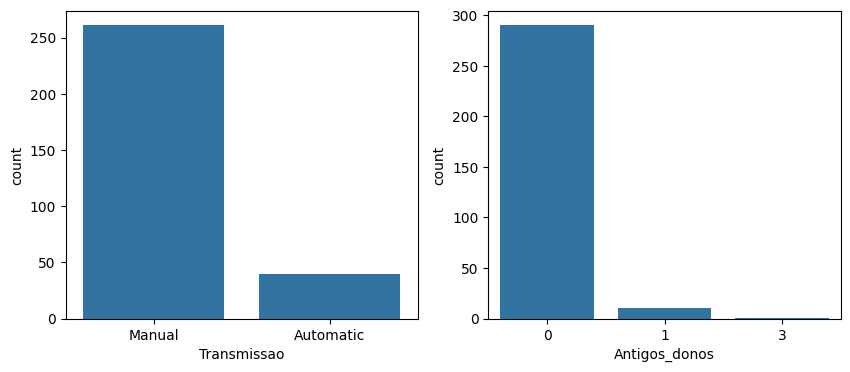

In [ ]:
cat_cols = ['Tipo_combustivel','Vendedor','Transmissao','Antigos_donos']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_or)
    i += 1

    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_or)
    i += 1

    plt.show()

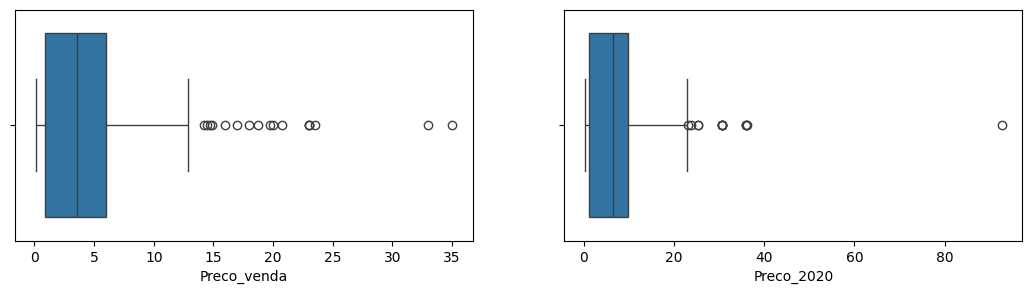

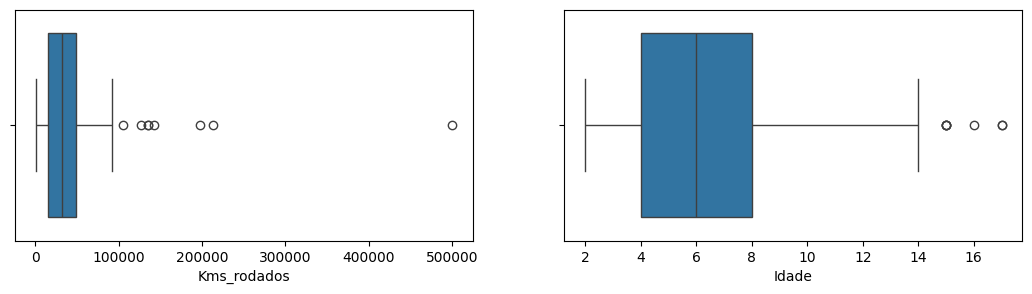

In [ ]:
num_cols = ['Preco_venda','Preco_2020','Kms_rodados','Idade']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_or)
    i += 1

    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_or)
    i += 1

    plt.show()

In [ ]:
def drop_outliers(df, feature):
    outliers = []
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    step = 1.5* (Q3 - Q1)
    feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))].index.tolist()
    # The feature_outliers variable is already a list of outlier indices.
    # Simply extend the 'outliers' list with it.
    outliers.extend(feature_outliers)
    return outliers

In [ ]:
df_outlier= df_or.copy()
target = 'Preco_venda'

outliers = drop_outliers(df_outlier, target).copy()
df_outlier = df_outlier.drop(df_outlier.index[outliers]).reset_index(drop=True)
df_outlier
print(df_or.shape[0])
print(df_outlier.shape[0])

df_outlier.head()

301
284


,Modelo,Preco_venda,Preco_2020,Kms_rodados,Tipo_combustivel,Vendedor,Transmissao,Antigos_donos,Idade
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [ ]:
df_outlier1= df_outlier.copy()
target = 'Kms_rodados'

outliers = drop_outliers(df_outlier, target).copy()
df_outlier1 = df_outlier.drop(df_outlier.index[outliers]).reset_index(drop=True)
df_outlier1
print(df_or.shape[0])
print(df_outlier1.shape[0])

df_outlier1.head()

301
278


,Modelo,Preco_venda,Preco_2020,Kms_rodados,Tipo_combustivel,Vendedor,Transmissao,Antigos_donos,Idade
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


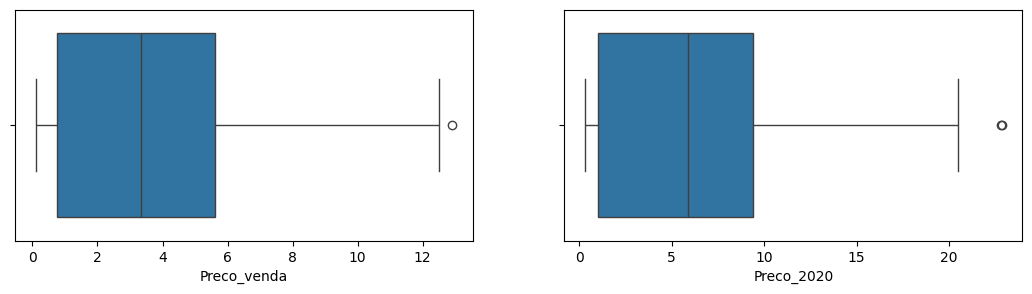

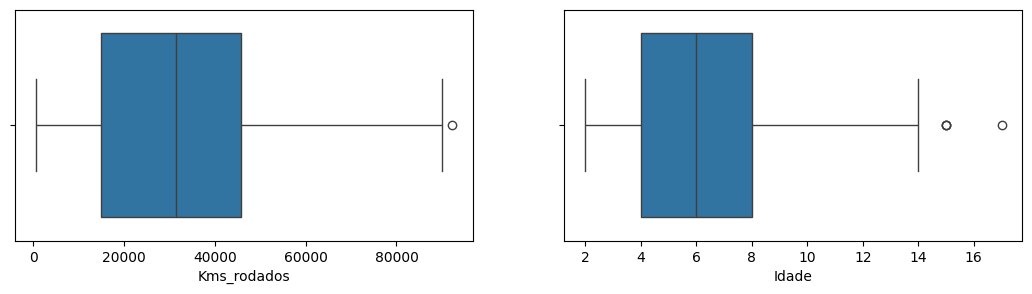

In [ ]:
num_cols = ['Preco_venda','Preco_2020','Kms_rodados','Idade']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_outlier1)
    i += 1

    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_outlier1)
    i += 1

    plt.show()

Fiz a remoção dos outliers aqui para trabalhar com uma base mais homogênea, mas a análise dos outliers pode ser valiosa trazendo novos insights (como por exemplo a valorização de um carro que se tornou relíquia)

#### Bivariate/Multi-Variate Analysis

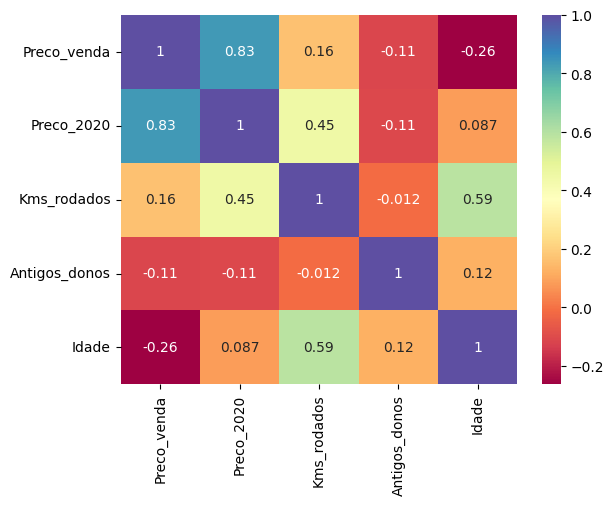

In [ ]:
sns.heatmap(df_outlier1.corr(numeric_only=True), annot=True, cmap="Spectral")
plt.show()

Através da análise de correlação, podemos ver que preço original e preço de revenda tem uma relação aproximadamente linear crescente, e que a idade do carro tem uma relação negativa sobre o preço de revenda, assim como a quantidade de donos anteriores.

### Data Preparation

#### Criação de dummies para as variáveis categóricas

Alguns modelos de machine learning não lidam bem com variáveis categóricas, utilizamos esse recurso para poder inserir as categorias na análise

In [ ]:
df_outlier1.drop(labels='Modelo',axis= 1, inplace = True)

In [ ]:
df_outlier1.head()

,Preco_venda,Preco_2020,Kms_rodados,Tipo_combustivel,Vendedor,Transmissao,Antigos_donos,Idade
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [ ]:
df_outlier1 = pd.get_dummies(data = df_outlier1,drop_first=True)

In [ ]:
df_outlier1.head()

,Preco_venda,Preco_2020,Kms_rodados,Antigos_donos,Idade,Tipo_combustivel_Diesel,Tipo_combustivel_Petrol,Vendedor_Individual,Transmissao_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


### Separação de Dados de Treino e Teste

In [ ]:

y = df_outlier1['Preco_venda']
X = df_outlier1.drop('Preco_venda',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (222, 8)
x test:  (56, 8)
y train:  (222,)
y test:  (56,)


### Criação dos modelos

#### Aplicando modelos de regressão
1. Linear Regression
2. Random Forest Regression
3. Gradient Boosting regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

#### Regressão Linear

Train R2-score : 0.85
Test R2-score : 0.88
Train CV scores : [0.84489053 0.83254821 0.85194617 0.81613802 0.79736525]
Train CV mean : 0.83


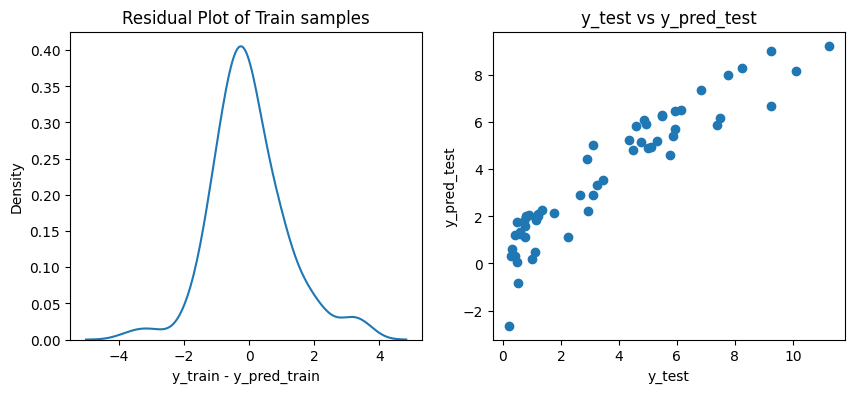

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.94
Test R2-score : 0.92
Train CV scores : [0.80192704 0.90631371 0.97060919 0.91592344 0.84003293]
Train CV mean : 0.89


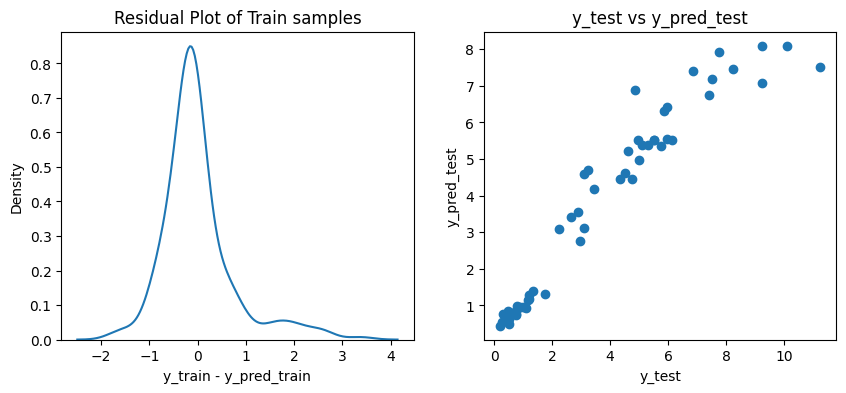

In [ ]:
car_pred_model(rf_rs,'random_forest.pkl')

In [ ]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=800)


#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.97
Train CV scores : [0.93719664 0.92635843 0.96966369 0.94113555 0.92591803]
Train CV mean : 0.94


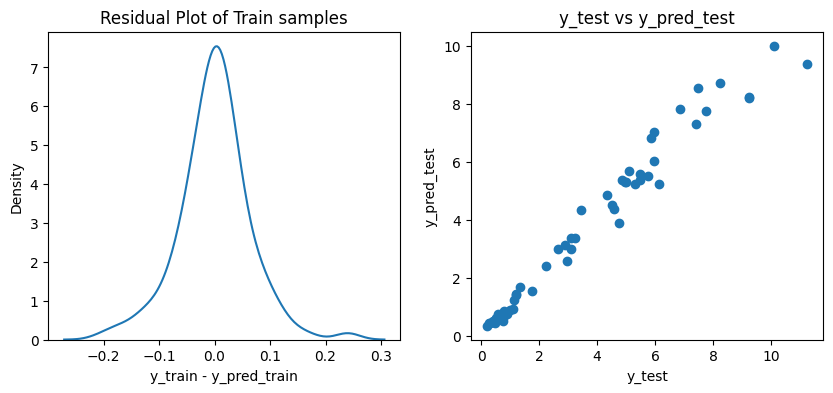

In [ ]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [ ]:
Technique = ["LinearRegression","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.85,0.88,0.83
1,RandomForestRegressor,0.94,0.92,0.89
2,GradientBoostingRegressor,1.00,0.97,0.94
